In [11]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '331bd993-a200-470d-a3a0-5c5eeef68d18',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


# Note:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" 
#             0r
# "jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000"

# Into the Anaconda Prompt to change this to allow to pull data
# If that didn't work try using the local host





{'status': {'timestamp': '2023-06-19T06:08:20.710Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 10379}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10247, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [12]:
# above is json in that dict type data present

In [13]:
type(data)

dict

In [14]:
import pandas as pd


# pd.set_option('display.max_columns', None)              # # This alows us to see all columns, not just like 15

# pd.set_option('display.max_rows', None)

In [15]:
pd.json_normalize(data['status'])    

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2023-06-19T06:08:20.710Z,0,None,17,1,None,10379


In [16]:
pd.set_option('display.max_columns', None)       

# Thi normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.940620e+07,1.940620e+07,False,NaN,1,NaN,NaN,None,2023-06-19T06:06:00.000Z,26466.476175,9.418539e+09,-4.5106,0.173223,-0.247442,2.618680,-1.518808,-8.552448,-4.584264,5.136137e+11,48.1482,5.557960e+11,None,2023-06-19T06:06:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7015,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202088e+08,1.202088e+08,True,NaN,2,NaN,NaN,None,2023-06-19T06:06:00.000Z,1726.876833,3.763748e+09,-8.0320,0.200800,-0.030779,-0.645387,-4.578618,-11.709699,-0.689221,2.075858e+11,19.4579,2.075858e+11,None,2023-06-19T06:06:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,55650,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.317388e+10,8.858353e+10,True,NaN,3,NaN,NaN,None,2023-06-19T06:06:00.000Z,0.999757,1.410016e+10,-5.8360,-0.001426,0.000907,-0.062120,-0.058007,-0.085249,-0.164850,8.315366e+10,7.7943,8.856200e+10,None,2023-06-19T06:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558533e+08,1.558533e+08,False,NaN,4,NaN,NaN,None,2023-06-19T06:06:00.000Z,243.340601,3.651528e+08,-12.2190,0.174777,-0.641689,8.010984,-21.087641,-25.164206,-26.705930,3.792544e+10,3.5549,3.792544e+10,None,2023-06-19T06:06:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,13035,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.834417e+10,2.834417e+10,False,NaN,5,NaN,NaN,None,2023-06-19T06:06:00.000Z,1.000007,1.953055e+09,-4.2074,-0.006825,-0.017319,-0.030926,-0.003275,-0.008197,0.198534,2.834437e+10,2.6568,2.834437e+10,None,2023-06-19T06:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,52,XRP,XRP,xrp,967,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-19T06:06:00.000Z,0.492389,8.300370e+08,49.8547,-0.079608,2.516125,-4.480325,5.963238,-0.739182,27.851158,2.559784e+10,2.3994,4.923892e+10,None,2023-06-19T06:06:00.000Z,NaN,NaN,NaN,NaN,NaN
6,2010,Cardano,ADA,cardano,841,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.492507e+10,3.588987e+10,False,NaN,7,NaN,NaN,None,2023-06-19T06:06:00.000Z,0.262054,1.275732e+08,-17.8271,0.167262,-1.586685,-3.902617,-28.166404,-37.379243,-21.992583,9.152257e+09,0.8579,1.179243e+10,None,2023-06-19T06:06:00.000Z,NaN,NaN,NaN,NaN,NaN
7,74,Dogecoin,DOGE,dogecoin,729,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.398270e+11,1.398270e+11,True,NaN,8,NaN,NaN,None,2023-06-19T06:06:00.000Z,0.062096,2.279688e+08,53.5829,0.124392,0.572877,2.283252,-15.354145,-32.180814,-13.292324,8.682733e+09,0.8139,8.682733e+09,None,2023-06-19T06:06:00.000Z,NaN,NaN,NaN,NaN,NaN
8,1958,TRON,TRX,tron,772,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem]",NaN,9.004050e+10,9.004051e+10,True,NaN,9,7.165966e+10,5.016841e+09,None,2023-06-19T06:06:00.000Z,0.070009,1.487378e+08,19.4348,-0.277544,-2.393740,0.155087,-1.009013,5.390856,6.496265,6.303671e+09,0.5909,6.303671e+09,None,2023-06-19T06:06:00.000

In [17]:
# pd.set_option('display.max_rows', None)        #  To display all rows in dataframe
# pd.json_normalize(data['data'])      

In [18]:
# adding timestamp column to know at what time i ran it

df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Chetan\AppData\Local\Temp\ipykernel_6924\3376784562.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.940620e+07,1.940620e+07,False,NaN,1,NaN,NaN,None,2023-06-19T06:06:00.000Z,26466.476175,9.418539e+09,-4.5106,0.173223,-0.247442,2.618680,-1.518808,-8.552448,-4.584264,5.136137e+11,48.1482,5.557960e+11,None,2023-06-19T06:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:08:25.548471
1,1027,Ethereum,ETH,ethereum,7015,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202088e+08,1.202088e+08,True,NaN,2,NaN,NaN,None,2023-06-19T06:06:00.000Z,1726.876833,3.763748e+09,-8.0320,0.200800,-0.030779,-0.645387,-4.578618,-11.709699,-0.689221,2.075858e+11,19.4579,2.075858e+11,None,2023-06-19T06:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:08:25.548471
2,825,Tether,USDT,tether,55650,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.317388e+10,8.858353e+10,True,NaN,3,NaN,NaN,None,2023-06-19T06:06:00.000Z,0.999757,1.410016e+10,-5.8360,-0.001426,0.000907,-0.062120,-0.058007,-0.085249,-0.164850,8.315366e+10,7.7943,8.856200e+10,None,2023-06-19T06:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-19 06:08:25.548471
3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558533e+08,1.558533e+08,False,NaN,4,NaN,NaN,None,2023-06-19T06:06:00.000Z,243.340601,3.651528e+08,-12.2190,0.174777,-0.641689,8.010984,-21.087641,-25.164206,-26.705930,3.792544e+10,3.5549,3.792544e+10,None,2023-06-19T06:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:08:25.548471
4,3408,USD Coin,USDC,usd-coin,13035,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.834417e+10,2.834417e+10,False,NaN,5,NaN,NaN,None,2023-06-19T06:06:00.000Z,1.000007,1.953055e+09,-4.2074,-0.006825,-0.017319,-0.030926,-0.003275,-0.008197,0.198534,2.834437e+10,2.6568,2.834437e+10,None,2023-06-19T06:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-19 06:08:25.548471
5,52,XRP,XRP,xrp,967,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-19T06:06:00.000Z,0.492389,8.300370e+08,49.8547,-0.079608,2.516125,-4.480325,5.963238,-0.739182,27.851158,2.559784e+10,2.3994,4.923892e+10,None,2023-06-19T06:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:08:25.548471
6,2010,Cardano,ADA,cardano,841,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.492507e+10,3.588987e+10,False,NaN,7,NaN,NaN,None,2023-06-19T06:06:00.000Z,0.262054,1.275732e+08,-17.8271,0.167262,-1.586685,-3.902617,-28.166404,-37.379243,-21.992583,9.152257e+09,0.8579,1.179243e+10,None,2023-06-19T06:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:08:25.548471
7,74,Dogecoin,DOGE,dogecoin,729,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.398270e+11,1.398270e+11,True,NaN,8,NaN,NaN,None,2023-06-19T06:06:00.000Z,0.062096,2.279688e+08,53.5829,0.124392,0.572877,2.283252,-15.354145,-32.180814,-13.292324,8.682733e+09,0.8139,8.682733e+09,None,2023-06-19T06:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:08:25.548471
8,1958,TRON,TRX,tron,772,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem]",NaN,9.004050e+10,9.

In [19]:
 # limit = 15

In [20]:
# we are creating function that will automatically append


def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    # url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '331bd993-a200-470d-a3a0-5c5eeef68d18',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
#       print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
#     df2 = pd.json_normalize(data['data'])
#     df2['timestamp'] = pd.to_datetime('now')
# #     df2['timestamp'] = pd.to_datetime('now', utc=True)
#     df = df.append(df2)
# #     df = pd.concat([df, df2])
    
    
    # every time after running it will appends duplicated data so changing df2 to df  
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 

    
    
    


        
        
    
    
    
    if not os.path.isfile(r'C:\Users\Chetan\Desktop\DA\Python\Automatic API\API.csv'):    # it checks in this path not present or not
        df.to_csv(r'C:\Users\Chetan\Desktop\DA\Python\Automatic API\API.csv', header='column_names')    # if not present it will create csv file with taking column_names as header
    else:
        df.to_csv(r'C:\Users\Chetan\Desktop\DA\Python\Automatic API\API.csv', mode='a',header=False)      # else if csv is present then appending data to it by mode=a, ameans append and alredy it has header so header=False
        

    
    



    


In [21]:
import os
from time import time
from time import sleep

for i in range(100):
    api_runner()
    print('API Runner Completed')
    sleep(60)          # sleep for 1 minute
exit()   

C:\Users\Chetan\AppData\Local\Temp\ipykernel_6924\3040819160.py:42: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner Completed


C:\Users\Chetan\AppData\Local\Temp\ipykernel_6924\3040819160.py:42: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner Completed


C:\Users\Chetan\AppData\Local\Temp\ipykernel_6924\3040819160.py:42: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner Completed


KeyboardInterrupt: 

In [22]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.940620e+07,1.940620e+07,False,NaN,1,NaN,NaN,None,2023-06-19T06:09:00.000Z,26450.703089,9.412957e+09,-4.0249,0.096332,-0.353484,2.598387,-1.578402,-8.763080,-4.731962,5.133076e+11,48.1261,5.554648e+11,None,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
1,1027,Ethereum,ETH,ethereum,7015,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202088e+08,1.202088e+08,True,NaN,2,NaN,NaN,None,2023-06-19T06:09:00.000Z,1725.932673,3.761812e+09,-7.1851,0.120490,-0.116100,-0.640791,-4.628079,-11.835870,-0.884298,2.074723e+11,19.4472,2.074723e+11,None,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
2,825,Tether,USDT,tether,55650,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.317388e+10,8.858353e+10,True,NaN,3,NaN,NaN,None,2023-06-19T06:09:00.000Z,0.999840,1.406111e+10,-5.7422,0.003643,0.017615,-0.035130,-0.057995,-0.075141,-0.244005,8.316060e+10,7.7950,8.856938e+10,None,2023-06-19T06:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-19 06:11:03.434347
3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558533e+08,1.558533e+08,False,NaN,4,NaN,NaN,None,2023-06-19T06:09:00.000Z,243.334086,3.653764e+08,-11.4136,0.171102,-0.750189,7.986082,-21.110786,-25.222761,-26.656445,3.792442e+10,3.5548,3.792442e+10,None,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
4,3408,USD Coin,USDC,usd-coin,13035,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.834417e+10,2.834417e+10,False,NaN,5,NaN,NaN,None,2023-06-19T06:09:00.000Z,1.000052,1.949753e+09,-4.2666,-0.001913,-0.002227,0.007823,0.002006,0.008350,0.160922,2.834563e+10,2.6570,2.834563e+10,None,2023-06-19T06:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-19 06:11:03.434347
5,52,XRP,XRP,xrp,967,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-19T06:09:00.000Z,0.492375,8.301207e+08,50.3717,-0.040775,2.482208,-4.456468,6.011989,-0.877486,28.076019,2.559710e+10,2.4004,4.923748e+10,None,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
6,2010,Cardano,ADA,cardano,841,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.492507e+10,3.588987e+10,False,NaN,7,NaN,NaN,None,2023-06-19T06:09:00.000Z,0.262089,1.274421e+08,-17.6086,0.175774,-1.651382,-4.355841,-28.144065,-37.451166,-21.971521,9.153492e+09,0.8580,1.179402e+10,None,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
7,74,Dogecoin,DOGE,dogecoin,729,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.398270e+11,1.398270e+11,True,NaN,8,NaN,NaN,None,2023-06-19T06:09:00.000Z,0.062077,2.276939e+08,53.2974,0.110472,0.528646,2.138052,-15.388343,-32.339104,-13.256732,8.680081e+09,0.8136,8.680081e+09,None,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
8,1958,TRON,TRX,tron,772,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem]",NaN,9.004050e+10,9.0040

In [23]:
# loading appended data from csv
df_appended=pd.read_csv(r'C:\Users\Chetan\Desktop\DA\Python\Automatic API\API.csv')
df_appended

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.940582e+07,1.940582e+07,False,NaN,1,NaN,NaN,NaN,2023-06-18T18:23:00.000Z,26585.840383,8.338644e+09,-34.2860,-0.046625,0.531777,2.357258,-1.257867,-9.331877,-4.261797,5.159200e+11,48.0575,5.583026e+11,NaN,2023-06-18T18:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-18 18:24:57.512402
1,1,1027,Ethereum,ETH,ethereum,7015,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202109e+08,1.202109e+08,True,NaN,2,NaN,NaN,NaN,2023-06-18T18:23:00.000Z,1739.302212,3.274202e+09,-39.0870,-0.203940,0.765819,-1.072865,-4.381289,-12.209016,-1.013589,2.090830e+11,19.4755,2.090830e+11,NaN,2023-06-18T18:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-18 18:24:57.512402
2,2,825,Tether,USDT,tether,55646,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.317388e+10,8.858353e+10,True,NaN,3,NaN,NaN,NaN,2023-06-18T18:23:00.000Z,1.000007,1.247445e+10,-33.7988,0.015363,0.054155,-0.036758,-0.019883,-0.060052,-0.129236,8.317442e+10,7.7477,8.858411e+10,NaN,2023-06-18T18:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-18 18:24:57.512402
3,3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558534e+08,1.558534e+08,False,NaN,4,NaN,NaN,NaN,2023-06-18T18:23:00.000Z,246.286708,3.547974e+08,-24.9639,-0.280779,0.721395,3.824081,-20.427506,-24.551285,-27.215801,3.838461e+10,3.5754,3.838461e+10,NaN,2023-06-18T18:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-18 18:24:57.512402
4,4,3408,USD Coin,USDC,usd-coin,13033,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.834442e+10,2.834442e+10,False,NaN,5,NaN,NaN,NaN,2023-06-18T18:23:00.000Z,1.000257,1.685361e+09,-41.0622,0.014535,0.030275,0.037258,0.023660,0.027813,0.256468,2.835170e+10,2.6409,2.835170e+10,NaN,2023-06-18T18:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-18 18:24:57.512402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,10,2,Litecoin,LTC,litecoin,924,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",8.400000e+07,7.317580e+07,8.400000e+07,False,NaN,11,NaN,NaN,NaN,2023-06-19T06:09:00.000Z,77.421518,2.756588e+08,9.1803,0.166419,0.403869,1.487378,-14.988462,-14.985434,-1.729902,5.665382e+09,0.5310,6.503407e+09,NaN,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
101,11,3890,Polygon,MATIC,polygon,743,2019-04-28T00:00:00.000Z,"['pos', 'platform', 'enterprise-solutions', 'z...",1.000000e+10,9.289469e+09,1.000000e+10,False,NaN,12,NaN,NaN,NaN,2023-06-19T06:09:00.000Z,0.600906,2.452469e+08,-28.0480,0.165306,-1.127897,-4.581519,-30.739590,-44.987145,-45.729240,5.582094e+09,0.5232,6.009056e+09,NaN,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
102,12,6636,Polkadot,DOT,polkadot-new,514,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.195930e+09,1.325409e+09,True,NaN,13,NaN,NaN,NaN,2023-06-19T06:09:00.000Z,4.570109,9.773206e+07,14.6557,-0.089163,1.053747,1.770664,-14.691185,-28.766167,-25.586073,5.465532e+09,0.5123

#### Transfering andData Cleaning

In [24]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [25]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19406200.00000,19406200.00000,False,NaN,1,NaN,NaN,None,2023-06-19T06:09:00.000Z,26450.70309,9412956553.91483,-4.02490,0.09633,-0.35348,2.59839,-1.57840,-8.76308,-4.73196,513307634290.48627,48.12610,555464764874.12000,None,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
1,1027,Ethereum,ETH,ethereum,7015,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120208826.30512,120208826.30512,True,NaN,2,NaN,NaN,None,2023-06-19T06:09:00.000Z,1725.93267,3761812107.17527,-7.18510,0.12049,-0.11610,-0.64079,-4.62808,-11.83587,-0.88430,207472340873.28668,19.44720,207472340873.29001,None,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
2,825,Tether,USDT,tether,55650,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83173876278.08653,88583529362.30705,True,NaN,3,NaN,NaN,None,2023-06-19T06:09:00.000Z,0.99984,14061106223.05061,-5.74220,0.00364,0.01762,-0.03513,-0.05800,-0.07514,-0.24400,83160595053.31497,7.79500,88569384322.82001,None,2023-06-19T06:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-19 06:11:03.434347
3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155853306.39274,155853306.39274,False,NaN,4,NaN,NaN,None,2023-06-19T06:09:00.000Z,243.33409,365376383.38389,-11.41360,0.17110,-0.75019,7.98608,-21.11079,-25.22276,-26.65645,37924421813.49123,3.55480,37924421813.49000,None,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
4,3408,USD Coin,USDC,usd-coin,13035,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28344169642.40258,28344169642.40258,False,NaN,5,NaN,NaN,None,2023-06-19T06:09:00.000Z,1.00005,1949752678.67683,-4.26660,-0.00191,-0.00223,0.00782,0.00201,0.00835,0.16092,28345632674.01775,2.65700,28345632674.02000,None,2023-06-19T06:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-19 06:11:03.434347
5,52,XRP,XRP,xrp,967,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51987017573.00000,99988884267.00000,False,NaN,6,NaN,NaN,None,2023-06-19T06:09:00.000Z,0.49237,830120710.25657,50.37170,-0.04077,2.48221,-4.45647,6.01199,-0.87749,28.07602,25597097814.50620,2.40040,49237480835.60000,None,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
6,2010,Cardano,ADA,cardano,841,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34925074154.09400,35889872797.59600,False,NaN,7,NaN,NaN,None,2023-06-19T06:09:00.000Z,0.26209,127442140.42557,-17.60860,0.17577,-1.65138,-4.35584,-28.14407,-37.45117,-21.97152,9153491888.12260,0.85800,11794023203.73000,None,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
7,74,Dogecoin,DOGE,dogecoin,729,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139827036383.70523,139827036383.70523,True,NaN,8,NaN,NaN,None,2023-06-19T06:09:00.000Z,0.06208,227693876.95733,53.29740,0.11047,0.52865,2.13805,-15.38834,-32.33910,-13.25673,8680081395.21382,0.81360,8680081395.21000,None,2023-06-19T06:09:00.00

In [26]:
df_appended

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19405818.00000,19405818.00000,False,NaN,1,NaN,NaN,NaN,2023-06-18T18:23:00.000Z,26585.84038,8338643802.47182,-34.28600,-0.04662,0.53178,2.35726,-1.25787,-9.33188,-4.26180,515919979843.52930,48.05750,558302648036.48999,NaN,2023-06-18T18:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-18 18:24:57.512402
1,1,1027,Ethereum,ETH,ethereum,7015,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120210867.22485,120210867.22485,True,NaN,2,NaN,NaN,NaN,2023-06-18T18:23:00.000Z,1739.30221,3274202149.41722,-39.08700,-0.20394,0.76582,-1.07286,-4.38129,-12.20902,-1.01359,209083027306.28384,19.47550,209083027306.28000,NaN,2023-06-18T18:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-18 18:24:57.512402
2,2,825,Tether,USDT,tether,55646,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83173876278.08653,88583529362.30705,True,NaN,3,NaN,NaN,NaN,2023-06-18T18:23:00.000Z,1.00001,12474451188.01539,-33.79880,0.01536,0.05415,-0.03676,-0.01988,-0.06005,-0.12924,83174422063.14766,7.74770,88584110645.39000,NaN,2023-06-18T18:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-18 18:24:57.512402
3,3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155853354.85213,155853354.85213,False,NaN,4,NaN,NaN,NaN,2023-06-18T18:23:00.000Z,246.28671,354797373.31998,-24.96390,-0.28078,0.72140,3.82408,-20.42751,-24.55128,-27.21580,38384609681.55651,3.57540,38384609681.56000,NaN,2023-06-18T18:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-18 18:24:57.512402
4,4,3408,USD Coin,USDC,usd-coin,13033,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28344421516.17258,28344421516.17258,False,NaN,5,NaN,NaN,NaN,2023-06-18T18:23:00.000Z,1.00026,1685360707.55174,-41.06220,0.01454,0.03028,0.03726,0.02366,0.02781,0.25647,28351703798.16928,2.64090,28351703798.17000,NaN,2023-06-18T18:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-18 18:24:57.512402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,10,2,Litecoin,LTC,litecoin,924,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.00000,73175801.72744,84000000.00000,False,NaN,11,NaN,NaN,NaN,2023-06-19T06:09:00.000Z,77.42152,275658779.50937,9.18030,0.16642,0.40387,1.48738,-14.98846,-14.98543,-1.72990,5665381616.94687,0.53100,6503407473.36000,NaN,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
101,11,3890,Polygon,MATIC,polygon,743,2019-04-28T00:00:00.000Z,"['pos', 'platform', 'enterprise-solutions', 'z...",10000000000.00000,9289469069.28493,10000000000.00000,False,NaN,12,NaN,NaN,NaN,2023-06-19T06:09:00.000Z,0.60091,245246874.94700,-28.04800,0.16531,-1.12790,-4.58152,-30.73959,-44.98714,-45.72924,5582093959.95387,0.52320,6009055973.30000,NaN,2023-06-19T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 06:11:03.434347
102,12,6636,Polkadot,DOT,polkadot-new,514,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1195930317.68498,1325409194.99016,True,NaN,13,NaN,NaN,NaN,

In [57]:
df3=df_appended.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.05797,0.17302,2.47526,-1.34950,-8.98896,-4.50880
Ethereum,-0.06116,0.38233,-0.89437,-4.46990,-12.00200,-1.02118
Tether,-0.00033,0.02758,-0.04817,-0.03636,-0.07097,-0.20149
BNB,-0.04438,0.07687,5.56656,-20.71555,-24.82435,-27.00236
USD Coin,0.00020,0.00948,0.01656,0.01540,0.00969,0.20402
XRP,-0.22060,2.47270,-5.34529,5.35002,-0.93107,29.60959
Cardano,0.06217,-0.82015,-2.57956,-27.81352,-36.81798,-20.95623
Dogecoin,-0.03312,0.79639,1.52207,-15.02498,-30.67834,-12.79833
TRON,-0.16891,-1.69923,0.28168,-0.56087,6.31109,7.12204


In [72]:
# 'quote.USD.percent_change_30d' like these are columns, these are vertical, it is hade for to do visualization, so if they present in rows then they are good for viusalization

# so we are using Stack


In [73]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     0.05797
         quote.USD.percent_change_24h    0.17302
         quote.USD.percent_change_7d     2.47526
         quote.USD.percent_change_30d   -1.34950
         quote.USD.percent_change_60d   -8.98896
                                          ...   
Dai      quote.USD.percent_change_24h    0.01741
         quote.USD.percent_change_7d    -0.00704
         quote.USD.percent_change_30d   -0.00462
         quote.USD.percent_change_60d    0.02539
         quote.USD.percent_change_90d    0.22449
Length: 90, dtype: float64

In [74]:
type(df4)                   # it is series, we need to convert it into DataFrame

pandas.core.series.Series

In [75]:
df5=df4.to_frame(name='values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.05797
        quote.USD.percent_change_24h  0.17302
        quote.USD.percent_change_7d   2.47526
        quote.USD.percent_change_30d -1.34950
        quote.USD.percent_change_60d -8.98896
...                                       ...
Dai     quote.USD.percent_change_24h  0.01741
        quote.USD.percent_change_7d  -0.00704
        quote.USD.percent_change_30d -0.00462
        quote.USD.percent_change_60d  0.02539
        quote.USD.percent_change_90d  0.22449

[90 rows x 1 columns]

In [76]:
type(df5)

pandas.core.frame.DataFrame

In [77]:
df6 = df5.set_index(df5['name'])
df6

KeyError: 'name'

In [78]:
df5.count()

values    90
dtype: int64

In [81]:
index = pd.Index(range(90))

df6 = df5.set_index(index)
df6

,values
0,0.05797
1,0.17302
2,2.47526
3,-1.34950
4,-8.98896
...,...
85,0.01741
86,-0.00704
87,-0.00462
88,0.02539


In [82]:
df6 =  df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.05797
1,Bitcoin,quote.USD.percent_change_24h,0.17302
2,Bitcoin,quote.USD.percent_change_7d,2.47526
3,Bitcoin,quote.USD.percent_change_30d,-1.34950
4,Bitcoin,quote.USD.percent_change_60d,-8.98896
...,...,...,...
85,Dai,quote.USD.percent_change_24h,0.01741
86,Dai,quote.USD.percent_change_7d,-0.00704
87,Dai,quote.USD.percent_change_30d,-0.00462
88,Dai,quote.USD.percent_change_60d,0.02539


In [83]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.05797
1,Bitcoin,quote.USD.percent_change_24h,0.17302
2,Bitcoin,quote.USD.percent_change_7d,2.47526
3,Bitcoin,quote.USD.percent_change_30d,-1.34950
4,Bitcoin,quote.USD.percent_change_60d,-8.98896
...,...,...,...
85,Dai,quote.USD.percent_change_24h,0.01741
86,Dai,quote.USD.percent_change_7d,-0.00704
87,Dai,quote.USD.percent_change_30d,-0.00462
88,Dai,quote.USD.percent_change_60d,0.02539


#### Visualization

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

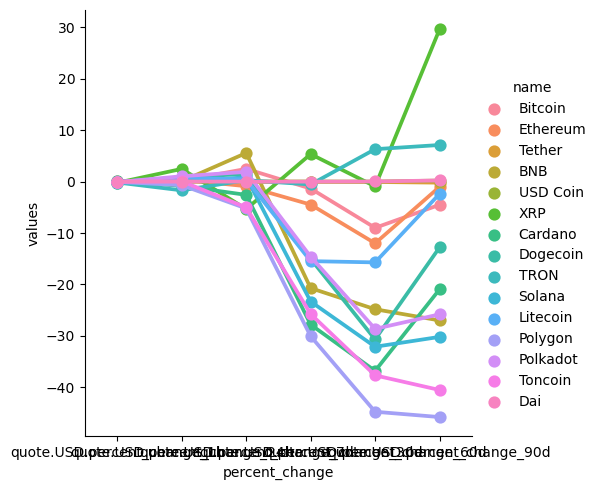

In [85]:
sns.catplot(x='percent_change', y='values',hue='name',data = df7, kind='point')

In [86]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.05797
1,Bitcoin,24h,0.17302
2,Bitcoin,7d,2.47526
3,Bitcoin,30d,-1.34950
4,Bitcoin,60d,-8.98896
...,...,...,...
85,Dai,24h,0.01741
86,Dai,7d,-0.00704
87,Dai,30d,-0.00462
88,Dai,60d,0.02539


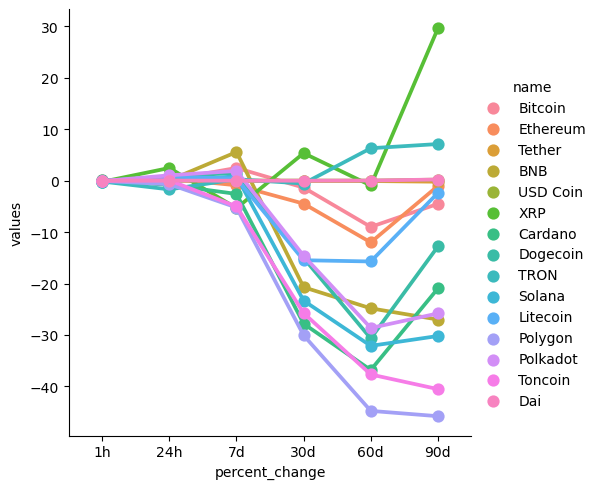

In [87]:
sns.catplot(x='percent_change', y='values',hue='name',data = df7, kind='point')

In [104]:
df10 = df_appended[['name','quote.USD.price','timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26585.84038,2023-06-18 18:24:57.512402
1,Ethereum,1739.30221,2023-06-18 18:24:57.512402
2,Tether,1.00001,2023-06-18 18:24:57.512402
3,BNB,246.28671,2023-06-18 18:24:57.512402
4,USD Coin,1.00026,2023-06-18 18:24:57.512402
...,...,...,...
100,Litecoin,77.42152,2023-06-19 06:11:03.434347
101,Polygon,0.60091,2023-06-19 06:11:03.434347
102,Polkadot,4.57011,2023-06-19 06:11:03.434347
103,Toncoin,1.39845,2023-06-19 06:11:03.434347


In [106]:
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26585.84038,2023-06-18 18:24:57.512402
15,Bitcoin,26596.11702,2023-06-18 18:28:48.745779
30,Bitcoin,26599.36622,2023-06-18 18:29:49.254623
45,Bitcoin,26598.43181,2023-06-18 18:30:51.111237
60,Bitcoin,26451.57299,2023-06-19 06:09:00.103659
75,Bitcoin,26449.43815,2023-06-19 06:10:03.025263
90,Bitcoin,26450.70309,2023-06-19 06:11:03.434347


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

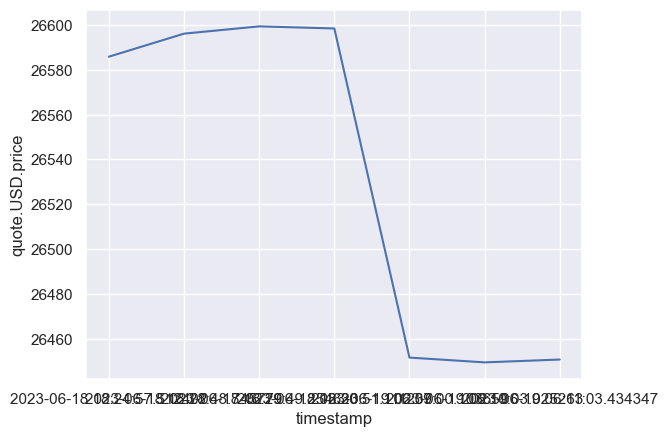

In [120]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)
